In [1]:
import os

import numpy as nrc_py
import pandas as pnl_data
from pandas import *
import sklearn

In [2]:
import random
skipped = random.sample(range(1, 1226258), 1164945)

In [3]:
print(len(skipped))
print(type(skipped))

1164945
<class 'list'>


In [4]:
def read_data_from_csv(path):

    assert os.path.exists(path), f'File not found: {path}!'
    assert os.path.splitext(path)[
        -1] == '.csv', f'Unsupported file type {os.path.splitext(path)[-1]}!'

    data = pnl_data.read_csv(path, skiprows=[i for i in skipped])
    #column_list = data.columns.values.tolist()
    #column_list.remove('publish_date')
    #print(type(data))
    
    X = data['headline_text'].tolist()
    text = data.headline_text.unique()
    #print(data.headline_text.unique())
    return X, text

In [5]:
# Downsize the dataset to the first 50K headlines (~5% samples)
# 1226258 x 0.95 =~ 1164945

In [6]:
data, text = read_data_from_csv("./abcnews-date-text.csv")
#print(X)

In [7]:
text

array(['act fire witnesses must be aware of defamation',
       'aussie qualifier stosur wastes four memphis match',
       'direct anger at govt not soldiers crean urges', ...,
       'coronavirus queensland hotel quarantine exemptions revealed',
       'shortage of pickers critical; but wages abysmal',
       'womens shed canberra reskilling unemployed pandemic'],
      dtype=object)

In [8]:
type(data)

list

In [9]:
type(text)

numpy.ndarray

In [10]:
print(len(data))
print(len(text))

61313
60675


In [11]:
"""
data = []
for i in range(50000):
    data.append(X[i])
"""

'\ndata = []\nfor i in range(50000):\n    data.append(X[i])\n'

In [12]:
"""
print(type(text))
print(len(data))
print(len(text))
"""

'\nprint(type(text))\nprint(len(data))\nprint(len(text))\n'

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

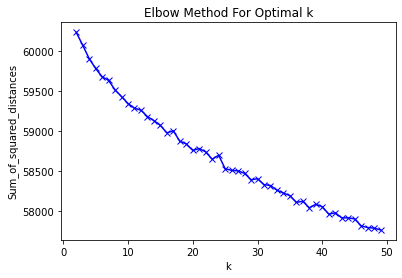

value of K: 
20


In [14]:
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(text)

Sum_of_squared_distances = []
K = range(2,50)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

print('value of K: ')
true_k = int(input())

In [15]:
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)

labels=model.labels_
clusters=pnl_data.DataFrame(list(zip(text,labels)),columns=['title','cluster'])
#print(clusters.sort_values(by=['cluster']))

for i in range(true_k):
    print(clusters[clusters['cluster'] == i])

                                                   title  cluster
1      aussie qualifier stosur wastes four memphis match        0
4                last minute call hands alinghi big lead        0
10              forest alliance rejects hindrance claims        0
11        landholder contribution still under discussion        0
12            nt govt announces community benefit grants        0
...                                                  ...      ...
60655  donald trump and joe biden christmas messages ...        0
60664  cate tregellas family secrets mallacoota bushf...        0
60666                     how will brexit affect aussies        0
60668     nt government coronavirus new case cattle ship        0
60674  womens shed canberra reskilling unemployed pan...        0

[18945 rows x 2 columns]
                                                   title  cluster
9                         drought taking toll on insects        1
17       industrial action to impact on brisbane s

In [16]:
type(clusters)

pandas.core.frame.DataFrame

In [17]:
clusters

,title,cluster
0,act fire witnesses must be aware of defamation,17
1,aussie qualifier stosur wastes four memphis match,0
2,direct anger at govt not soldiers crean urges,18
3,griffiths under fire over project knock back,17
4,last minute call hands alinghi big lead,0
...,...,...
60670,where to celebrate new years eve in tasmania,12
60671,coronavirus covid 19 china wuhan cdc serologic...,1
60672,coronavirus queensland hotel quarantine exempt...,10
60673,shortage of pickers critical; but wages abysmal,16


In [ ]:
#https://medium.com/kuzok/news-documents-clustering-using-python-latent-semantic-analysis-b95c7b68861c
#https://www.researchgate.net/figure/Example-of-the-elbow-criterion-applied-over-the-curve-of-within-class-sum-of-squares-per_fig1_281443471